# Breast Cancer Project – Análise Exploratória (EDA)

## 1. Importações iniciais

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from ipywidgets import Tab, VBox, Output

pd.set_option('display.max_columns', None)

## 2. Carregar os dados

In [33]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 3. Exploração geral
- Tipos de dados
- Valores faltantes
- Balanceamento da variável alvo

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
df.describe(include='O')

,diagnosis
count,569
unique,2
top,B
freq,357


In [34]:
# stardarlising column names

# new
df['concave_points_worst'] = df['concave points_worst']
df['concave_points_se'] = df['concave points_se']
df['concave_points_mean'] = df['concave points_mean']

#drop
df = df.drop(columns=['concave points_worst', 'concave points_se', 'concave points_mean'])

## 4. Visualizações importantes
- Histogramas
- Boxplots
- Correlação (heatmap)


In [35]:
pd.DataFrame(df.isnull().sum().sort_values(ascending = False)).head(40)

,0
Unnamed: 32,569
id,0
concavity_se,0
concave_points_se,0
concave_points_worst,0
fractal_dimension_worst,0
symmetry_worst,0
concavity_worst,0
compactness_worst,0
smoothness_worst,0


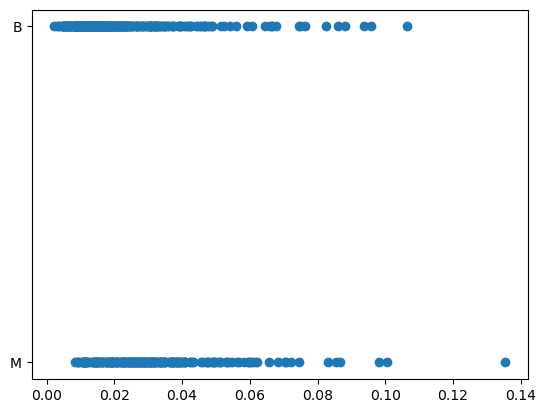

In [11]:
plt.scatter(x='compactness_se', y='diagnosis', data=df)

In [13]:
outliers = []

df.query('compactness_se > 0.12')
#874858

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,concave_points_worst,concave_points_se,concave_points_mean\t
190,874858,M,14.22,23.12,94.37,609.9,0.1075,0.2413,0.1981,0.2384,0.07542,0.286,2.11,2.112,31.72,0.00797,0.1354,0.1166,0.05113,0.01172,15.74,37.18,106.4,762.4,0.1533,0.9327,0.8488,0.5166,0.1446,NaN,0.1772,0.01666,0.06618


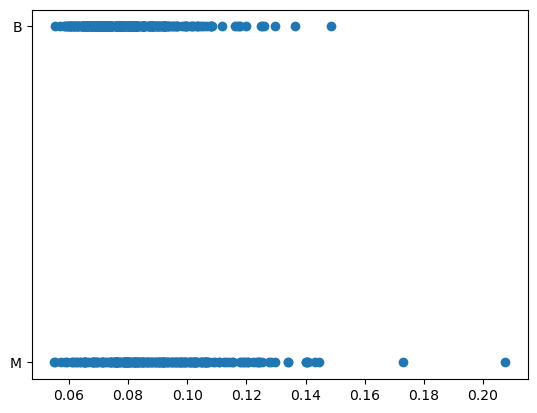

In [14]:
plt.scatter(x='fractal_dimension_worst', y='diagnosis', data=df)

In [119]:
df.query('fractal_dimension_worst > 0.15')
#84348301, 84501001

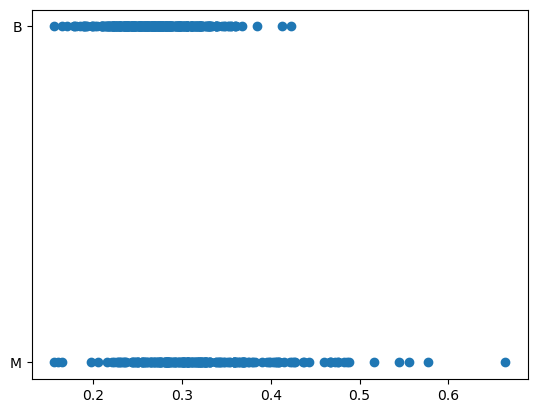

In [16]:
plt.scatter(x='symmetry_worst', y='diagnosis', data=df)

In [120]:
df.query('symmetry_worst > 0.6')
#84348301

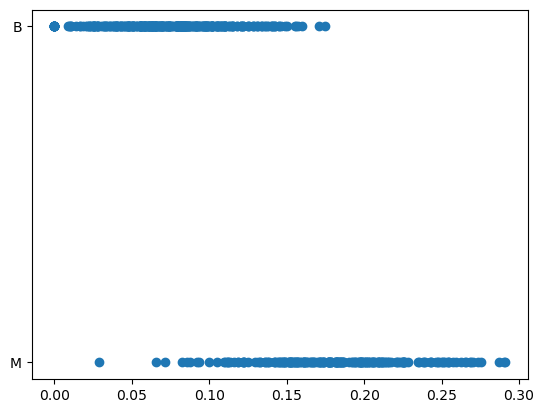

In [29]:
plt.scatter(x='concave_points_worst', y='diagnosis', data=df)

In [121]:
df.query('concave_points_worst > 0.28')
#8611555, 86355, 873593 MAYBE

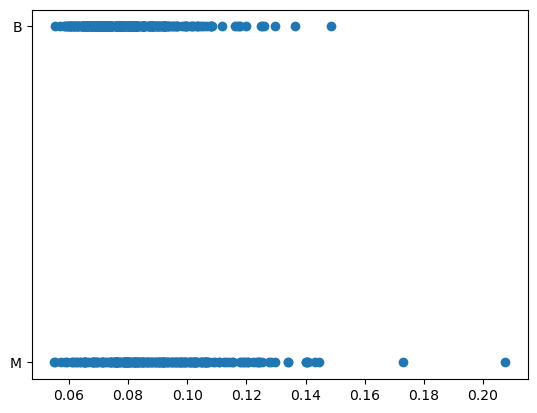

In [30]:
plt.scatter(x='fractal_dimension_worst', y='diagnosis', data=df)

In [123]:
df.query('fractal_dimension_worst > 0.2')
#84501001

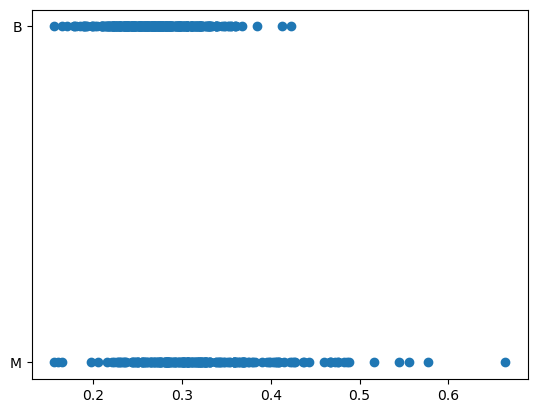

In [36]:
plt.scatter(x='symmetry_worst', y='diagnosis', data=df)

In [124]:
df.query('symmetry_worst > 0.6')
#84348301

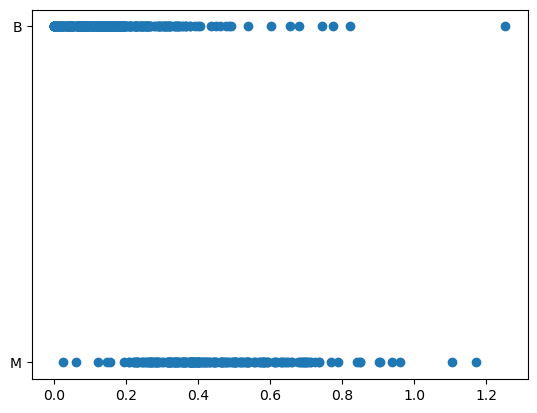

In [39]:
plt.scatter(x='concavity_worst', y='diagnosis', data=df)

In [128]:
df.query('concavity_worst > 1.1')
#859471 B
#84501001, 925622 MAYBE

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,concave_points_worst,concave_points_se
9,84501001,M,12.460,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.2030,0.08243,0.2976,1.599,2.039,23.94,0.007149,0.07217,0.07743,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.105,0.4366,0.2075,NaN,0.2210,0.01432
68,859471,B,9.029,17.33,58.79,250.5,0.1066,0.1413,0.3130,0.04375,0.2111,0.08046,0.3274,1.194,1.885,17.67,0.009549,0.08606,0.30380,0.04197,0.009559,10.31,22.65,65.50,324.7,0.1482,0.4365,1.252,0.4228,0.1175,NaN,0.1750,0.03322
562,925622,M,15.220,30.62,103.40,716.9,0.1048,0.2087,0.2550,0.09429,0.2128,0.07152,0.2602,1.205,2.362,22.65,0.004625,0.04844,0.07359,0.02137,0.006142,17.52,42.79,128.70,915.0,0.1417,0.7917,1.170,0.4089,0.1409,NaN,0.2356,0.01608


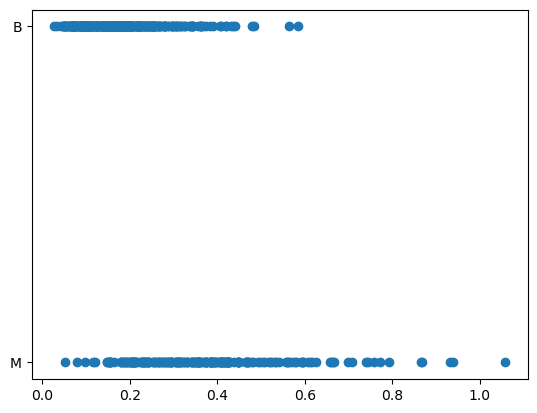

In [42]:
plt.scatter(x='compactness_worst', y='diagnosis', data=df)

In [130]:
df.query('compactness_worst > 1')
#84501001


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,concave_points_worst,concave_points_se
9,84501001,M,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.203,0.08243,0.2976,1.599,2.039,23.94,0.007149,0.07217,0.07743,0.01789,0.01008,15.09,40.68,97.65,711.4,0.1853,1.058,1.105,0.4366,0.2075,NaN,0.221,0.01432


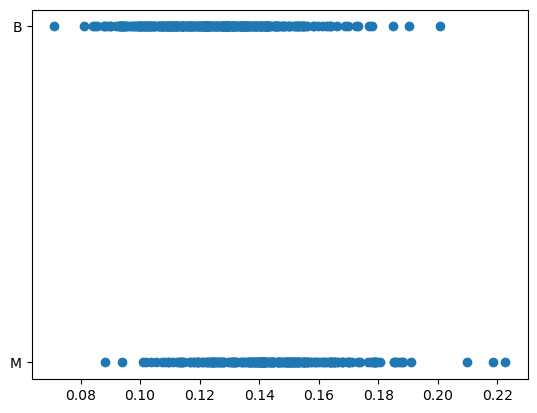

In [44]:
plt.scatter(x='smoothness_worst', y='diagnosis', data=df)

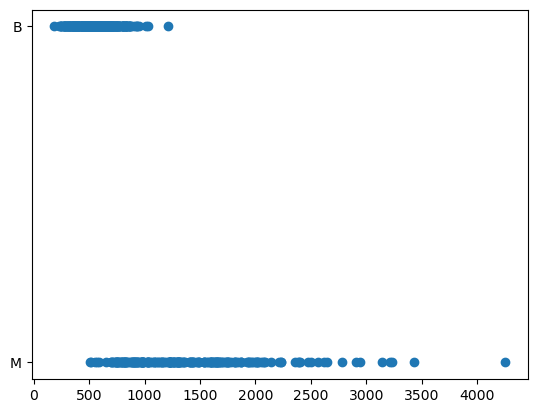

In [45]:
plt.scatter(x='area_worst', y='diagnosis', data=df)

In [131]:
df.query('area_worst > 2500')
#get rid of all MAYBE

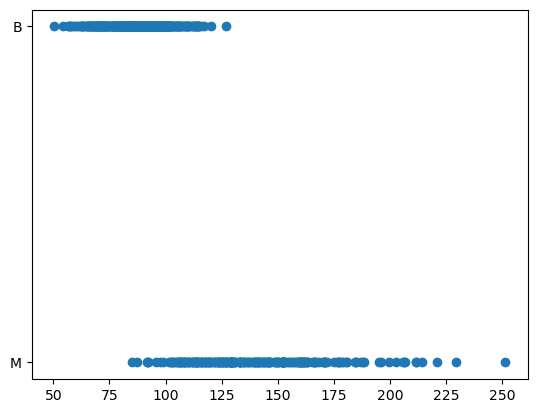

In [47]:
plt.scatter(x='perimeter_worst', y='diagnosis', data=df)

In [132]:
df.query('perimeter_worst > 200')
#get rid of all MAYBE 

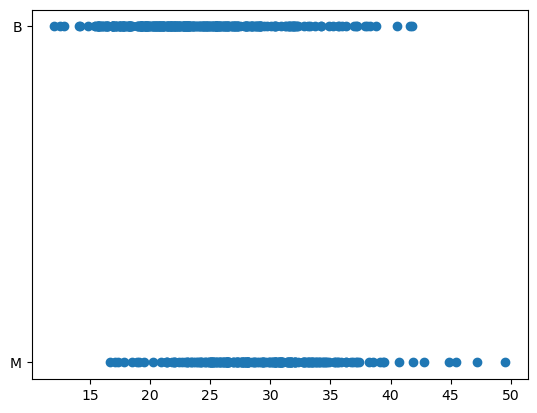

In [49]:
plt.scatter(x='texture_worst', y='diagnosis', data=df)

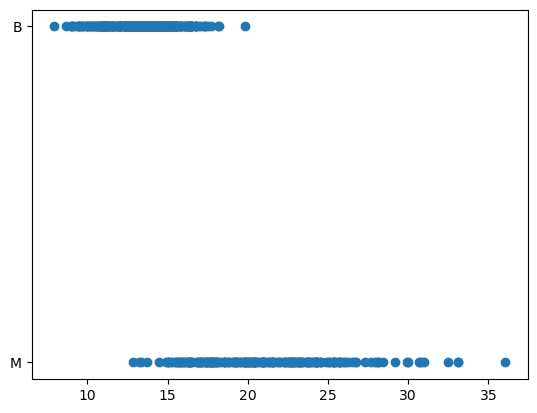

In [50]:
plt.scatter(x='radius_worst', y='diagnosis', data=df)

In [134]:
df.query('radius_worst > 30')
#get rid of all MAYBE 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,concave_points_worst,concave_points_se
180,873592,M,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.2871,0.18780,0.1800,0.05770,0.8361,1.4810,5.820,128.7,0.004631,0.02537,0.03109,0.01575,0.002747,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2856,0.08082,NaN,0.2688,0.01241
236,88299702,M,23.21,26.97,153.5,1670.0,0.09509,0.16820,0.1950,0.12370,0.1909,0.06309,1.0580,0.9635,7.247,155.8,0.006428,0.02863,0.04497,0.01590,0.003053,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.3103,0.08677,NaN,0.2593,0.01716
265,88995002,M,20.73,31.12,135.7,1419.0,0.09469,0.11430,0.1367,0.08646,0.1769,0.05674,1.1720,1.6170,7.749,199.7,0.004551,0.01478,0.02143,0.01367,0.002299,32.49,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.2868,0.08218,NaN,0.1659,0.00928
339,89812,M,23.51,24.27,155.1,1747.0,0.10690,0.12830,0.2308,0.14100,0.1797,0.05506,1.0090,0.9245,6.462,164.1,0.006292,0.01971,0.03582,0.01479,0.003118,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2593,0.07738,NaN,0.2089,0.01301
352,899987,M,25.73,17.46,174.2,2010.0,0.11490,0.23630,0.3368,0.19130,0.1956,0.06121,0.9948,0.8509,7.222,153.1,0.006369,0.04243,0.04266,0.02335,0.003385,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.3690,0.08815,NaN,0.2756,0.01508
368,9011971,M,21.71,17.25,140.9,1546.0,0.09384,0.08562,0.1168,0.08465,0.1717,0.05054,1.2070,1.0510,7.733,224.1,0.005568,0.01112,0.02096,0.01263,0.001803,30.75,26.44,199.5,3143.0,0.1363,0.1628,0.2861,0.2510,0.06494,NaN,0.1820,0.01197
461,911296202,M,27.42,26.27,186.9,2501.0,0.10840,0.19880,0.3635,0.16890,0.2061,0.05623,2.5470,1.3060,18.650,542.2,0.007650,0.05374,0.08055,0.01697,0.004558,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2641,0.07427,NaN,0.2625,0.02598
503,915143,M,23.09,19.83,152.1,1682.0,0.09342,0.12750,0.1676,0.10030,0.1505,0.05484,1.2910,0.7452,9.635,180.2,0.005753,0.03356,0.03976,0.02201,0.002897,30.79,23.87,211.5,2782.0,0.1199,0.3625,0.3794,0.2908,0.07277,NaN,0.2264,0.02156


In [136]:
df.query("diagnosis == 'B' & radius_worst > 19")
#91376702

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,concave_points_worst,concave_points_se
491,91376702,B,17.85,13.23,114.6,992.1,0.07838,0.06217,0.04445,0.04178,0.122,0.05243,0.4834,1.046,3.163,50.95,0.004369,0.008274,0.01153,0.01302,0.001309,19.82,18.42,127.1,1210.0,0.09862,0.09976,0.1048,0.1783,0.05871,NaN,0.08341,0.007437


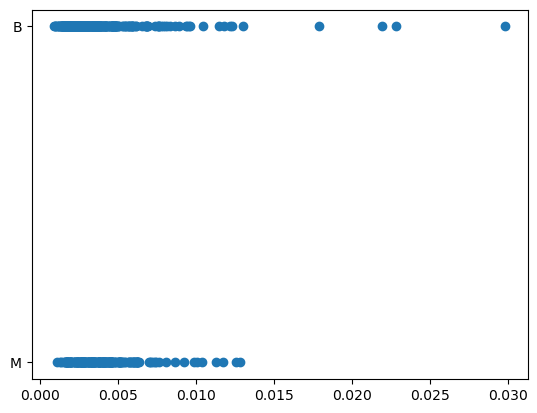

In [59]:
plt.scatter(x='fractal_dimension_se', y='diagnosis', data=df)
#no effect on diagnosis whatsoever

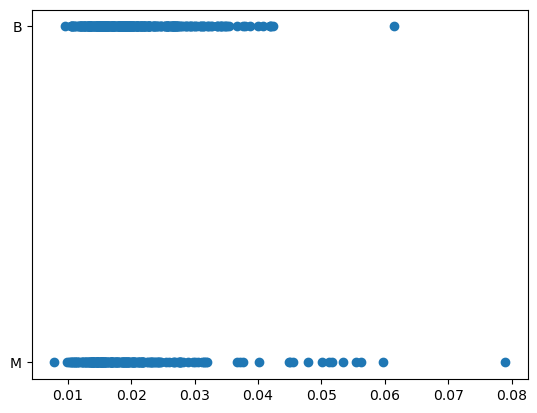

In [60]:
plt.scatter(x='symmetry_se', y='diagnosis', data=df)

In [137]:
df.query("symmetry_se > 0.058")
#84348301, 8610862, 894047

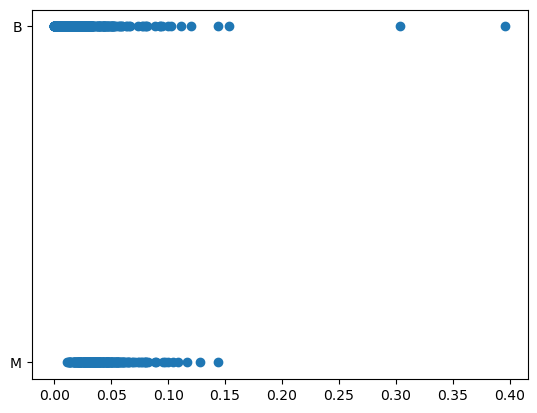

In [65]:
plt.scatter(x='concavity_se', y='diagnosis', data=df)
#no effect on diagnosis whatsoever

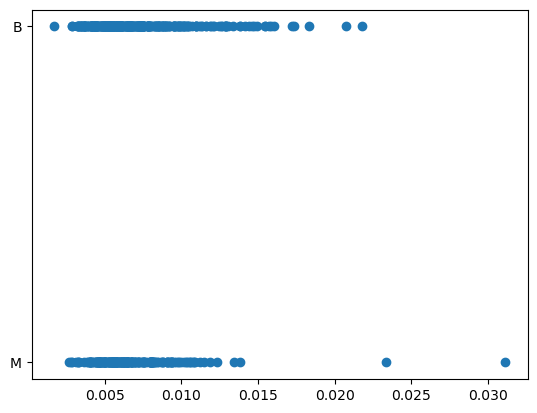

In [66]:
plt.scatter(x='smoothness_se', y='diagnosis', data=df)

In [68]:
df.query("smoothness_se > 0.020")
#pretty strange, MAYBE drop

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,concave_points_worst,concave_points_se
122,865423,M,24.250,20.20,166.20,1761.0,0.1447,0.28670,0.4268,0.20120,0.2655,0.06877,1.5090,3.120,9.807,233.00,0.02333,0.09806,0.12780,0.04547,0.009875,26.020,23.99,180.90,2073.0,0.1696,0.42440,0.5803,0.3222,0.08009,NaN,0.2248,0.01822
213,881094802,M,17.420,25.56,114.50,948.0,0.1006,0.11460,0.1682,0.06597,0.1308,0.05866,0.5296,1.667,3.767,58.53,0.03113,0.08555,0.14380,0.02175,0.012560,18.070,28.07,120.40,1021.0,0.1243,0.17930,0.2803,0.1603,0.06818,NaN,0.1099,0.03927
314,894047,B,8.597,18.60,54.09,221.2,0.1074,0.05847,0.0000,0.00000,0.2163,0.07359,0.3368,2.777,2.222,17.81,0.02075,0.01403,0.00000,0.06146,0.006820,8.952,22.44,56.65,240.1,0.1347,0.07767,0.0000,0.3142,0.08116,NaN,0.0000,0.00000
505,915276,B,9.676,13.14,64.12,272.5,0.1255,0.22040,0.1188,0.07038,0.2057,0.09575,0.2744,1.390,1.787,17.67,0.02177,0.04888,0.05189,0.02632,0.011480,10.600,18.04,69.47,328.1,0.2006,0.36630,0.2913,0.2848,0.13640,NaN,0.1075,0.01450


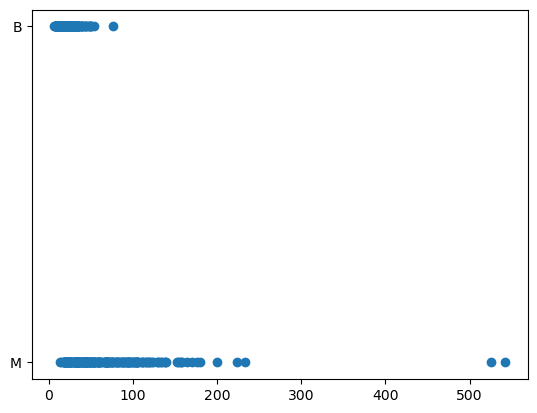

In [69]:
plt.scatter(x='area_se', y='diagnosis', data=df)

In [138]:
df.query("area_se > 200")
#get rid of all MAYBE 

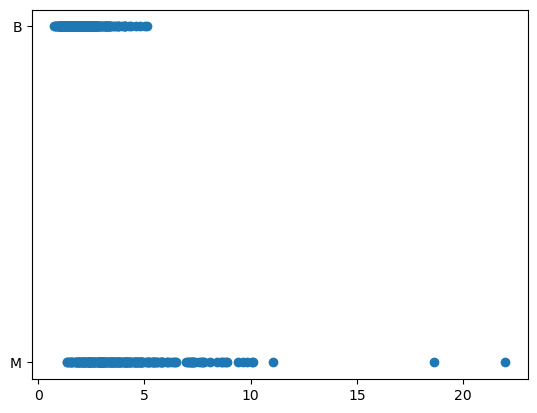

In [71]:
plt.scatter(x='perimeter_se', y='diagnosis', data=df)

In [139]:
df.query("perimeter_se > 10")
#get rid of all MAYBE 

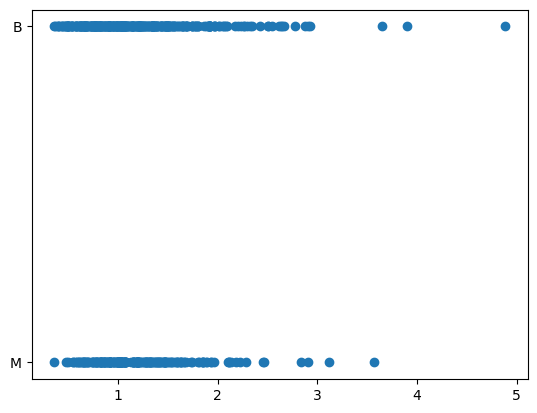

In [10]:
plt.scatter(x='texture_se', y='diagnosis', data=df)
#not very trustable

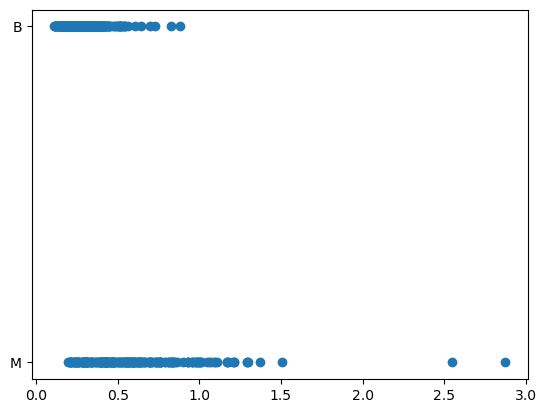

In [11]:
plt.scatter(x='radius_se', y='diagnosis', data=df)

In [17]:
df.query("radius_se > 2.5")
#8810703, 911296202

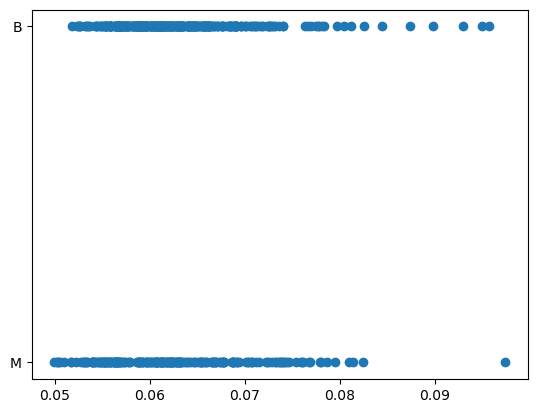

In [18]:
plt.scatter(x='fractal_dimension_mean', y='diagnosis', data=df)
#not very trustable

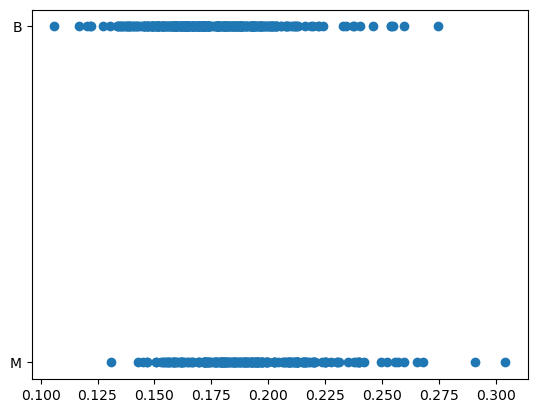

In [19]:
plt.scatter(x='symmetry_mean', y='diagnosis', data=df)

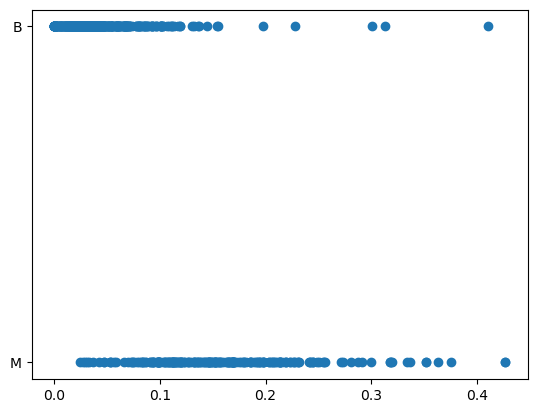

In [20]:
plt.scatter(x='concavity_mean', y='diagnosis', data=df)

In [22]:
df.query("concavity_mean > 0.4")
#8710441

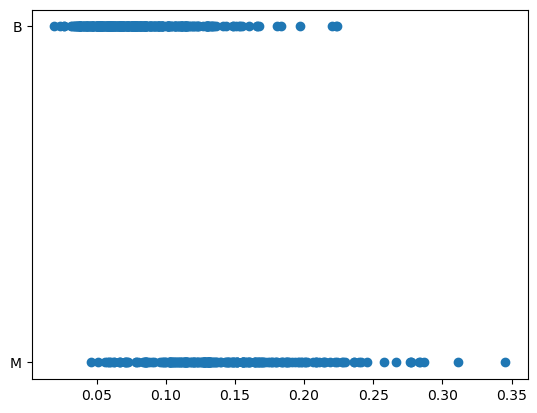

In [23]:
plt.scatter(x='compactness_mean', y='diagnosis', data=df)

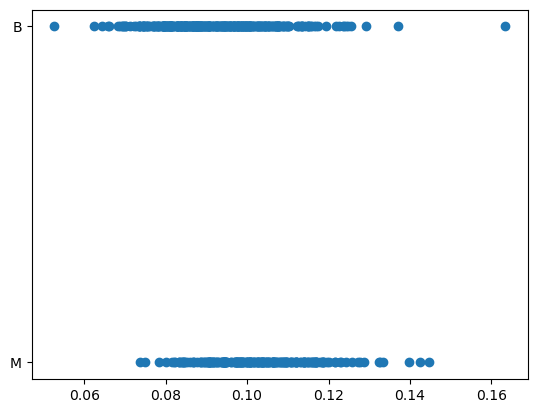

In [24]:
plt.scatter(x='smoothness_mean', y='diagnosis', data=df)
#not very trustable

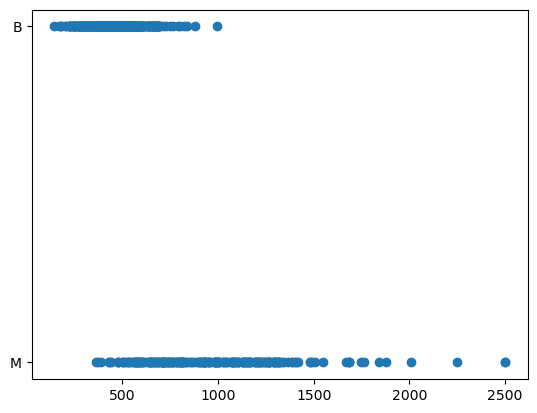

In [25]:
plt.scatter(x='area_mean', y='diagnosis', data=df)

In [28]:
df.query("area_mean > 2000")
#873592, 8810703, 899987, 911296202

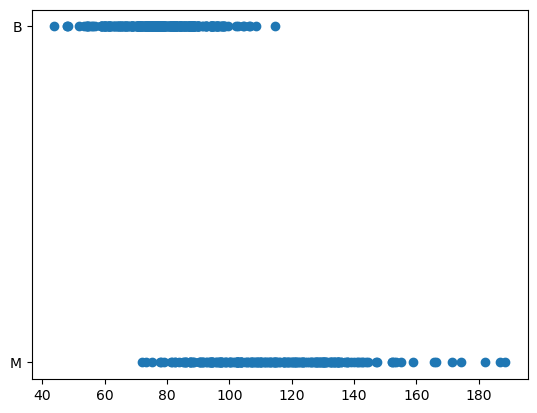

In [29]:
plt.scatter(x='perimeter_mean', y='diagnosis', data=df)

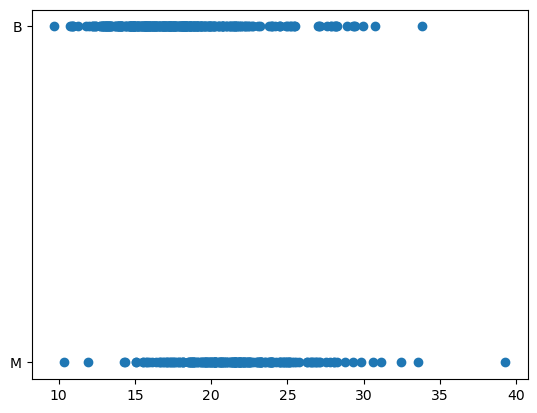

In [30]:
plt.scatter(x='texture_mean', y='diagnosis', data=df)
#not very trustable

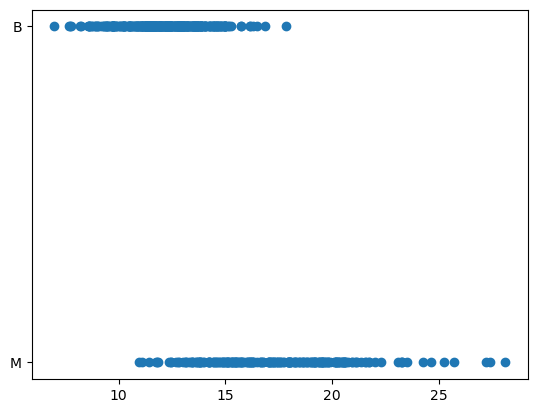

In [31]:
plt.scatter(x='radius_mean', y='diagnosis', data=df)

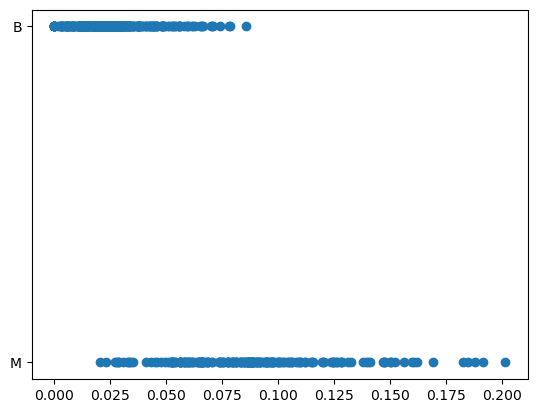

In [36]:
plt.scatter(x='concave_points_mean', y='diagnosis', data=df)

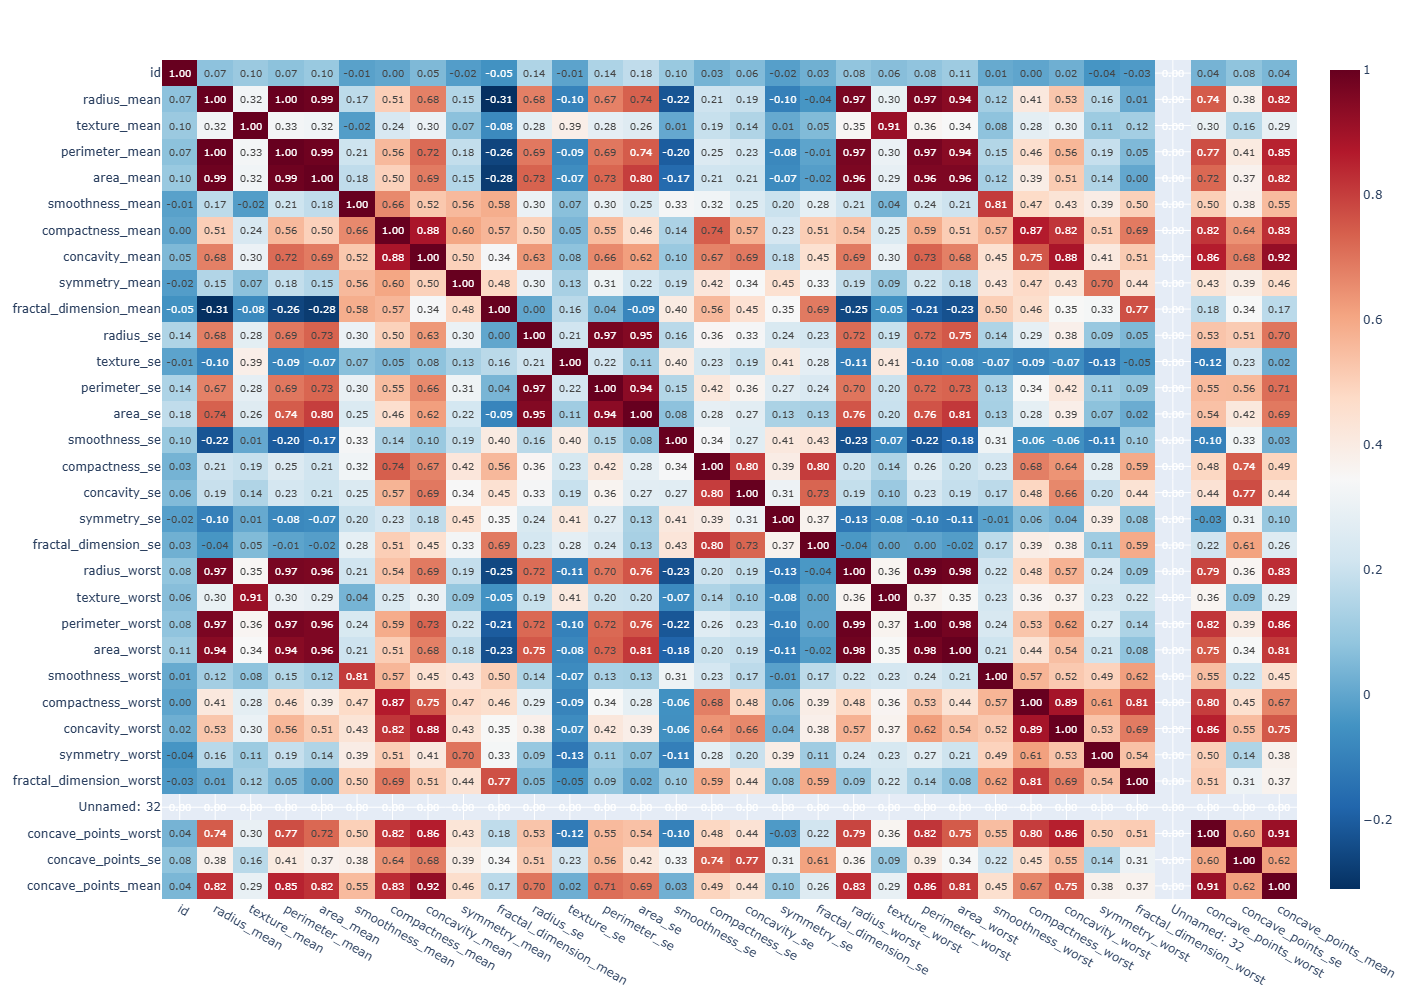

In [42]:
correlation_matrix = df.corr(numeric_only=True)

fig = px.imshow(
    correlation_matrix,
    text_auto=".2f",
    color_continuous_scale="RdBu_r",
    aspect="auto",
)

fig.update_layout(
    width=1400,
    height=1000,
)
fig.show()

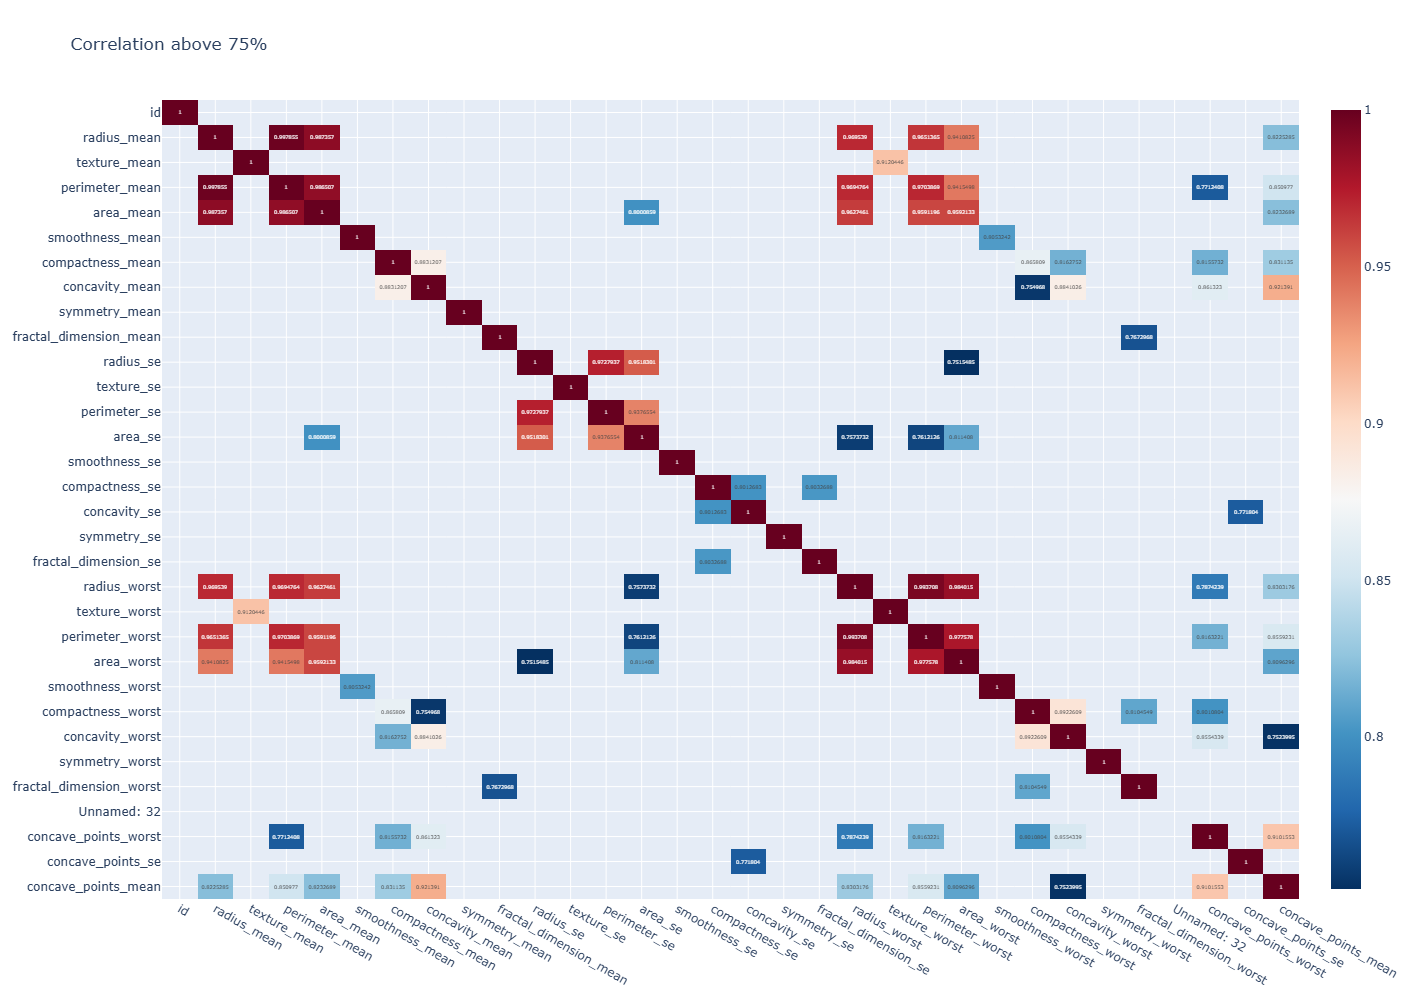

In [51]:
mask = correlation_matrix.abs() > 0.75

# aplica máscara e substitui valores baixos por NaN
filtered_corr = correlation_matrix.where(mask)

fig_filtered = px.imshow(
    filtered_corr,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    aspect="auto",
    title="Correlation above 75%"
)
fig_filtered.update_layout(
    width=1400,
    height=1000)
fig_filtered.show()

In [37]:
# tem uma coluna que talvez eu exclua, os outliers tao salvos em outliers
#only unique values
outliers = list(dict.fromkeys(outliers))

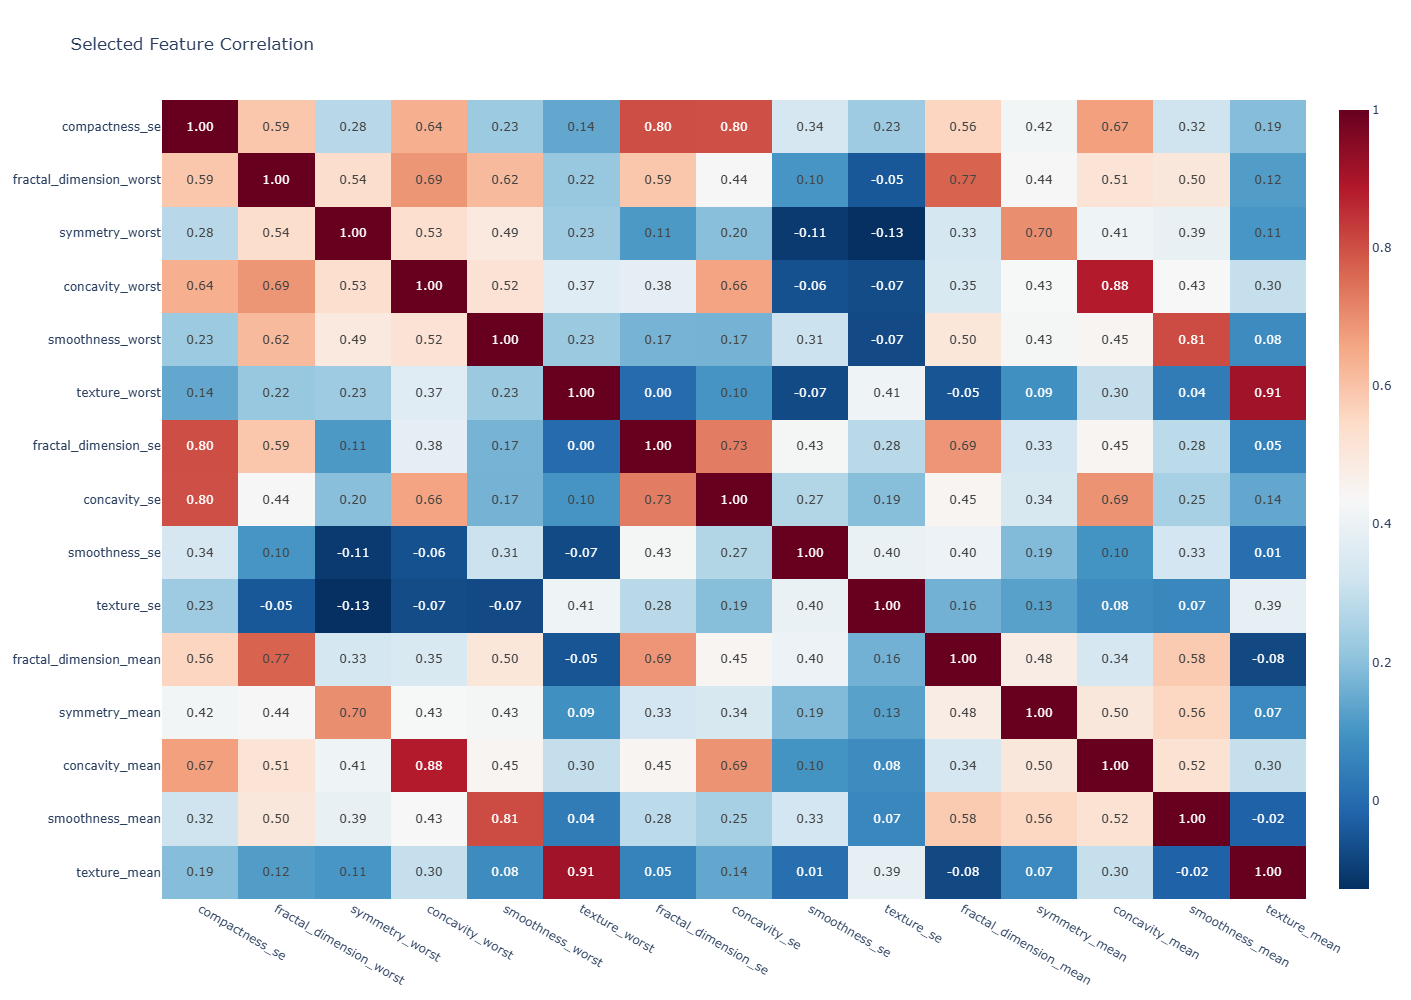

In [44]:
selected_features = [
    "compactness_se", "fractal_dimension_worst", "symmetry_worst",
    "concavity_worst", "smoothness_worst", "texture_worst",
    "fractal_dimension_se", "concavity_se", "smoothness_se",
    "texture_se", "fractal_dimension_mean", "symmetry_mean",
    "concavity_mean", "smoothness_mean", "texture_mean"
]

# Criar matriz de correlação só dessas features usando sua correlation_matrix
corr_selected = correlation_matrix.loc[selected_features, selected_features]

# Heatmap interativo com Plotly
fig_selected = px.imshow(
    corr_selected,
    text_auto=".2f",
    color_continuous_scale="RdBu_r",
    aspect="auto",
    title="Selected Feature Correlation"
)

fig_selected.update_layout(
    width=1400,
    height=1000,
)
fig_selected.show()

## 6) Conclusion

This dataset counts with 29 features (excluding 'Id' and 'diagnosis') and non NaN values.

All outliers found where stored in a `outliers` variable, outliers where defined using three different assumptions:
- Values 